# Can we identify the need for panel cleaning/maintenance?

## Prepare

In [2]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data set (we use plant 2 here)

plant2_g = pd.read_csv('./data/Plant_2_Generation_Data.csv')
plant2_s = pd.read_csv('./data/Plant_2_Weather_Sensor_Data.csv')

# Find the size of data
print(plant2_g.shape)
print(plant2_s.shape)

(67698, 7)
(3259, 6)


In [3]:
# Details about the generation data
print(plant2_g.sample(5))
print("We have",len(plant2_g.SOURCE_KEY .unique()),"inverters for plant 2 generation data.")

                 DATE_TIME  PLANT_ID       SOURCE_KEY    DC_POWER    AC_POWER  \
45437  2020-06-07 11:00:00   4136001  Et9kgGMDl729KT4    0.000000    0.000000   
26281  2020-05-29 06:45:00   4136001  rrq4fwE8jgrTyWY  118.814286  115.528571   
46070  2020-06-07 18:00:00   4136001  xMbIugepa2P7lBB  105.873333  102.900000   
52780  2020-06-10 22:15:00   4136001  xMbIugepa2P7lBB    0.000000    0.000000   
4442   2020-05-17 02:30:00   4136001  xMbIugepa2P7lBB    0.000000    0.000000   

       DAILY_YIELD   TOTAL_YIELD  
45437     0.000000  1.817252e+06  
26281    55.642857  1.210397e+08  
46070  7740.600000  1.068387e+08  
52780  5523.000000  1.068613e+08  
4442   7722.000000  1.066738e+08  
We have 22 inverters for plant 2 generation data.


In [4]:
# Details about the  weather sensor data
plant2_s.sample(5)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
1307,2020-05-28 15:15:00,4136001,iq8k7ZNt4Mwm3w0,36.609568,52.341303,0.634010
1488,2020-05-30 12:45:00,4136001,iq8k7ZNt4Mwm3w0,34.492780,57.077078,0.884461
2335,2020-06-08 09:00:00,4136001,iq8k7ZNt4Mwm3w0,28.029827,38.455458,0.559821
1743,2020-06-02 04:45:00,4136001,iq8k7ZNt4Mwm3w0,23.118444,22.331250,0.000000
1403,2020-05-29 15:15:00,4136001,iq8k7ZNt4Mwm3w0,36.103869,48.935517,0.594327


In [5]:
# Join table
data = pd.merge(plant2_s, plant2_g, on='DATE_TIME', how='outer', suffixes=('_s', '_g'))
data[['DATE', 'TIME']] = data['DATE_TIME'].str.split(' ', expand=True)
print(data.sample(5))


                 DATE_TIME  PLANT_ID_s     SOURCE_KEY_s  AMBIENT_TEMPERATURE  \
40029  2020-06-04 21:30:00     4136001  iq8k7ZNt4Mwm3w0            24.474093   
27941  2020-05-30 03:30:00     4136001  iq8k7ZNt4Mwm3w0            23.665156   
63591  2020-06-16 01:15:00     4136001  iq8k7ZNt4Mwm3w0            23.882562   
18312  2020-05-24 16:15:00     4136001  iq8k7ZNt4Mwm3w0            38.775182   
40656  2020-06-05 04:30:00     4136001  iq8k7ZNt4Mwm3w0            23.541043   

       MODULE_TEMPERATURE  IRRADIATION  PLANT_ID_g     SOURCE_KEY_g  \
40029           22.554964     0.000000     4136001  Mx2yZCDsyf6DPfv   
27941           22.855199     0.000000     4136001  vOuJvMaM2sgwLmb   
63591           22.922873     0.000000     4136001  Mx2yZCDsyf6DPfv   
18312           49.991356     0.385322     4136001  9kRcWv60rDACzjR   
40656           22.629009     0.000000     4136001  rrq4fwE8jgrTyWY   

         DC_POWER    AC_POWER  DAILY_YIELD   TOTAL_YIELD        DATE      TIME  
40029    0.

## Testing

### By single day (May-18)

In [6]:
may_18_data = data[data['DATE'] == '2020-05-18']
may_18_data

,DATE_TIME,PLANT_ID_s,SOURCE_KEY_s,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_ID_g,SOURCE_KEY_g,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
6314,2020-05-18 00:00:00,4136001,iq8k7ZNt4Mwm3w0,23.441600,23.655607,0.0,4136001,4UPUqMRk7TRMgml,0.0,0.0,6342.000000,2.445231e+06,2020-05-18,00:00:00
6315,2020-05-18 00:00:00,4136001,iq8k7ZNt4Mwm3w0,23.441600,23.655607,0.0,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215293e+09,2020-05-18,00:00:00
6316,2020-05-18 00:00:00,4136001,iq8k7ZNt4Mwm3w0,23.441600,23.655607,0.0,4136001,9kRcWv60rDACzjR,0.0,0.0,2225.333333,2.247743e+09,2020-05-18,00:00:00
6317,2020-05-18 00:00:00,4136001,iq8k7ZNt4Mwm3w0,23.441600,23.655607,0.0,4136001,Et9kgGMDl729KT4,0.0,0.0,306.866667,1.719490e+06,2020-05-18,00:00:00
6318,2020-05-18 00:00:00,4136001,iq8k7ZNt4Mwm3w0,23.441600,23.655607,0.0,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,2396.000000,1.996631e+07,2020-05-18,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8421,2020-05-18 23:45:00,4136001,iq8k7ZNt4Mwm3w0,25.765358,24.498940,0.0,4136001,q49J1IKaHRwDQnt,0.0,0.0,4161.000000,3.624400e+05,2020-05-18,23:45:00
8422,2020-05-18 23:45:00,4136001,iq8k7ZNt4Mwm3w0,25.765358,24.498940,0.0,4136001,rrq4fwE8jgrTyWY,0.0,0.0,4215.000000,1.209862e+08,2020-05-18,23:45:00
8423,2020-05-18 23:45:00,4136001,iq8k7ZNt4Mwm3w0,25.765358,24.498940,0.0,4136001,vOuJvMaM2sgwLmb,0.0,0.0,4119.500000,2.237035e+06,2020-05-18,23:45:00
8424,2020-05-18 23:45:00,4136001,iq8k7ZNt4Mwm3w0,25.765358,24.498940,0.0,4136001,xMbIugepa2P7lBB,0.0,0.0,7696.000000,1.066886e+08,2020-05-18,23:45:00


/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_86031/741637607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_18_data['TIME'] = pd.to_datetime(may_18_data['TIME'], format='%H:%M:%S')


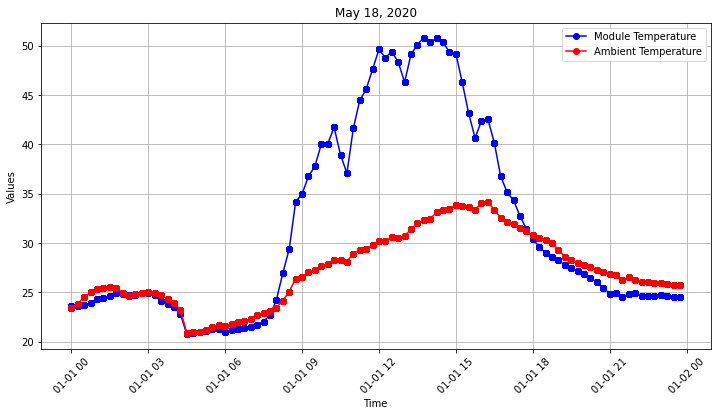

In [7]:


# Converting TIME to datetime format
may_18_data['TIME'] = pd.to_datetime(may_18_data['TIME'], format='%H:%M:%S')

plt.figure(figsize=(12, 6))
plt.plot(may_18_data['TIME'], may_18_data['MODULE_TEMPERATURE'], marker='o', linestyle='-', color='b', label='Module Temperature')
plt.plot(may_18_data['TIME'], may_18_data['AMBIENT_TEMPERATURE'], marker='o', linestyle='-', color='r', label='Ambient Temperature')
plt.title('May 18, 2020')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()




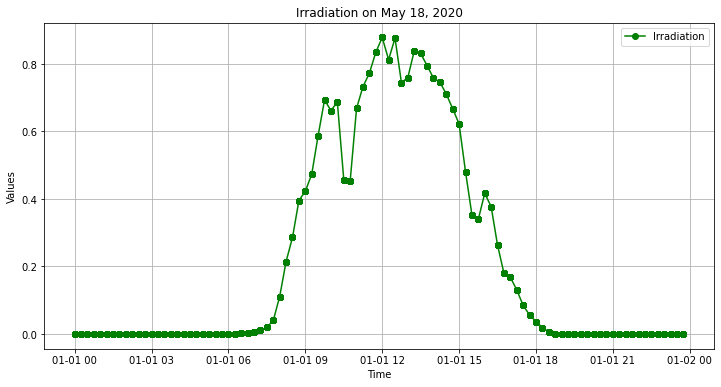

In [8]:

plt.figure(figsize=(12, 6))
plt.plot(may_18_data['TIME'], may_18_data['IRRADIATION'], marker='o', linestyle='-', color='g', label='Irradiation')
plt.title('Irradiation on May 18, 2020')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()




### All the dates

/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_86031/379162971.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data['TIME'] = pd.to_datetime(date_data['TIME'], format='%H:%M:%S')
/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_86031/379162971.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data['TIME'] = pd.to_datetime(date_data['TIME'], format='%H:%M:%S')
/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_86031/379162971.py:11: SettingWithCopyWarning: 
A v

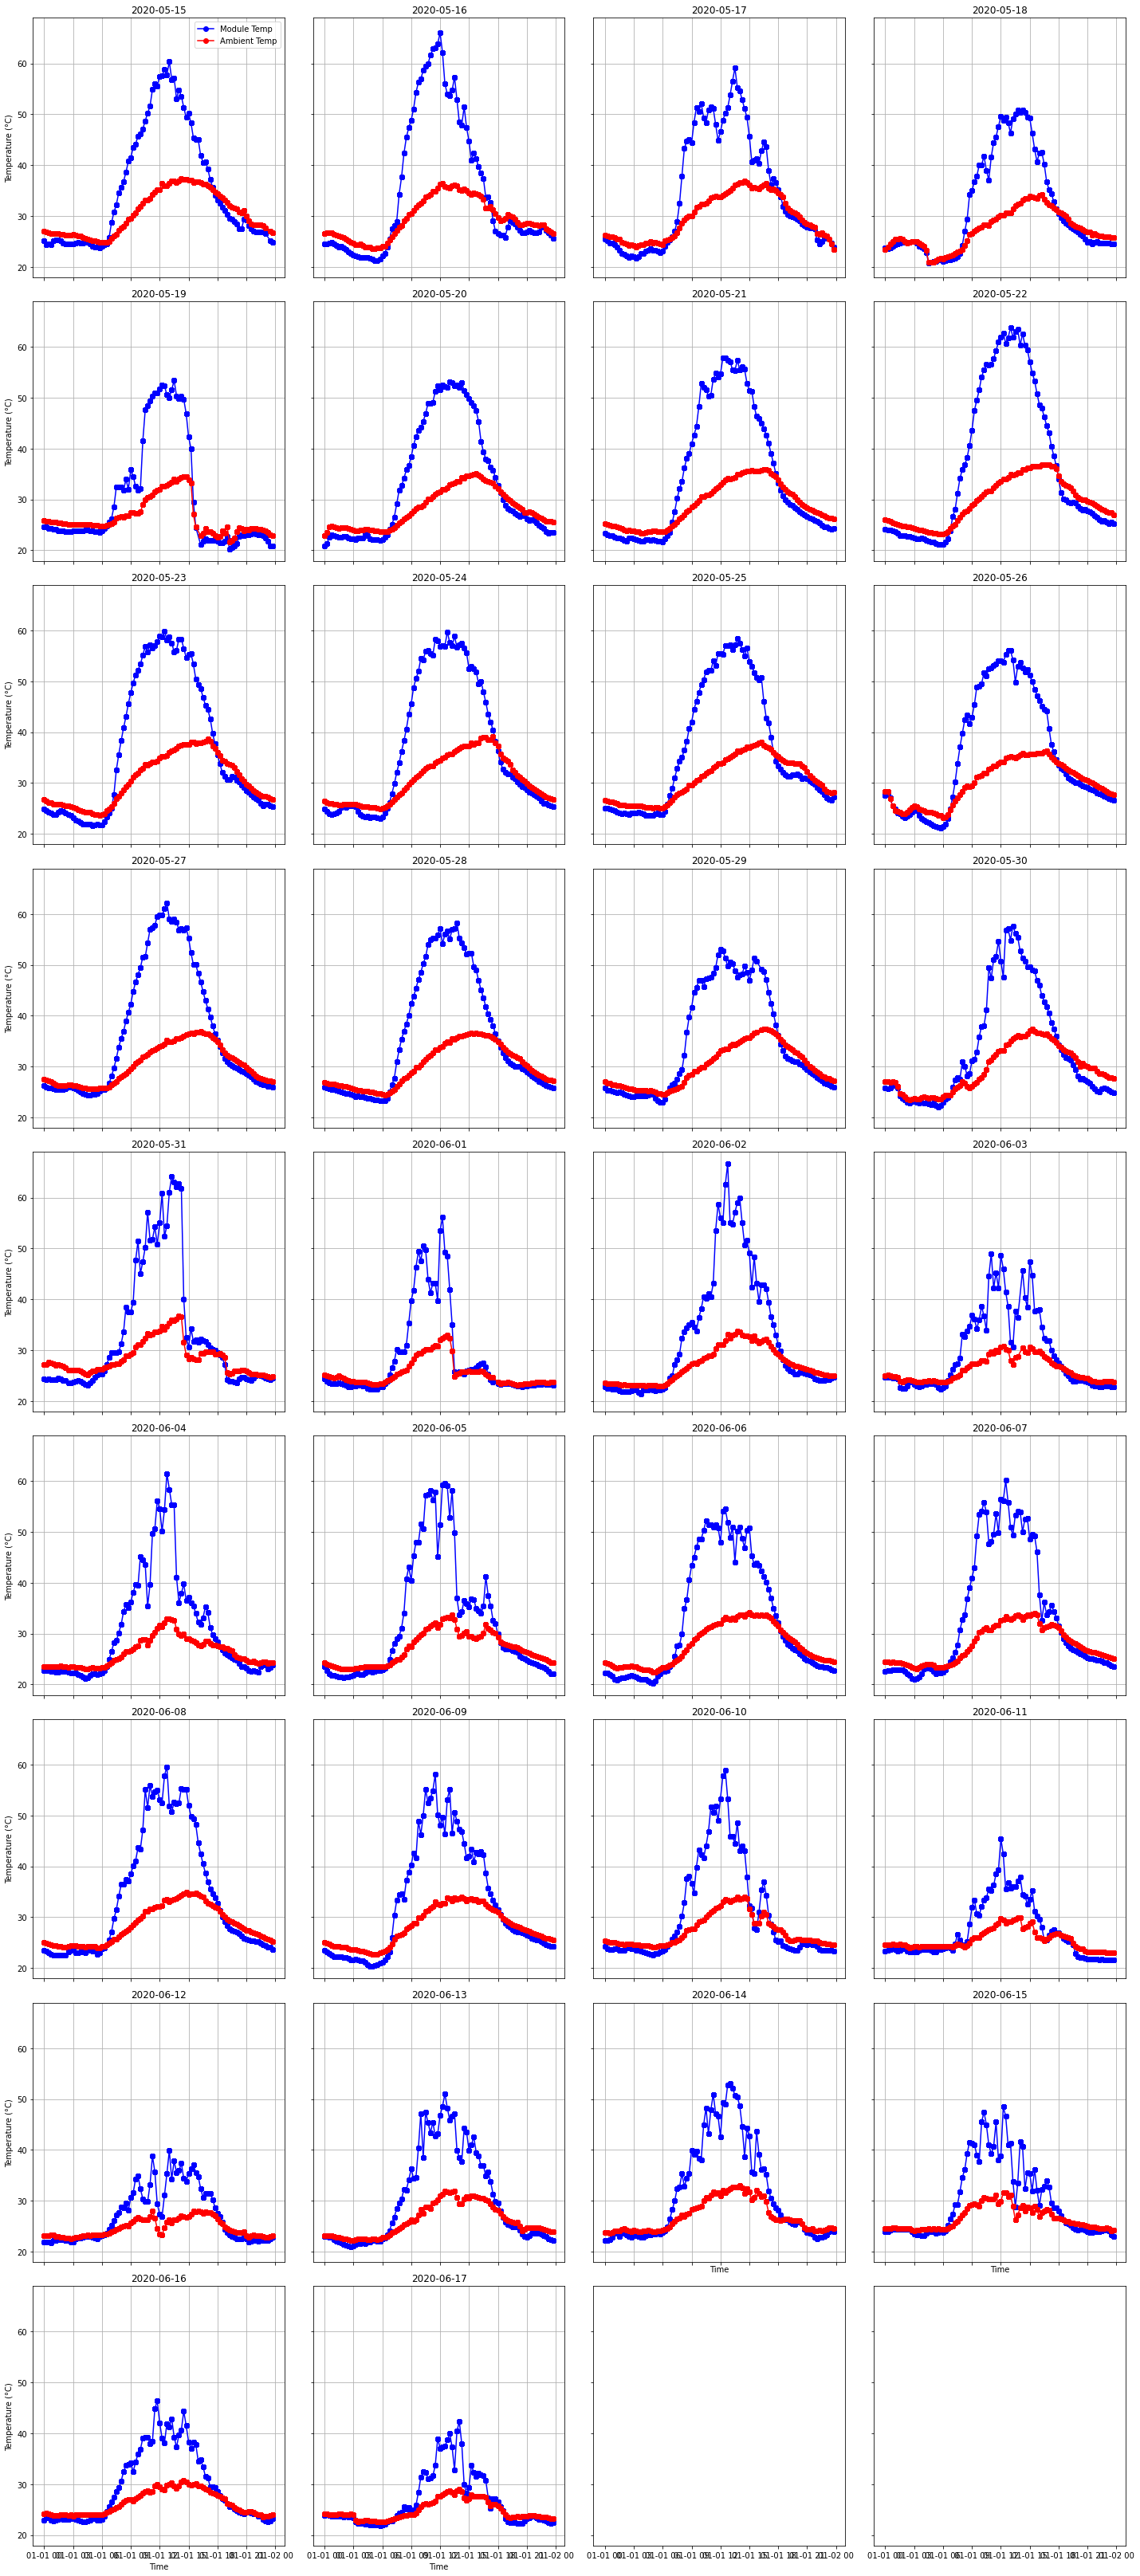

In [9]:
# Plotting MODULE_TEMPERATURE and AMBIENT_TEMPERATURE vs TIME for all dates
unique_dates = data['DATE'].unique()
num_dates = len(unique_dates)

# Setting up the plot grid
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 45), sharex=True, sharey=True)
axes = axes.flatten()

for i, date in enumerate(unique_dates):
    date_data = data[data['DATE'] == date]
    date_data['TIME'] = pd.to_datetime(date_data['TIME'], format='%H:%M:%S')
    
    ax = axes[i]
    ax.plot(date_data['TIME'], date_data['MODULE_TEMPERATURE'], marker='o', linestyle='-', color='b', label='Module Temp')
    ax.plot(date_data['TIME'], date_data['AMBIENT_TEMPERATURE'], marker='o', linestyle='-', color='r', label='Ambient Temp')
    ax.set_title(date)
    ax.grid(True)
    if i % 4 == 0:
        ax.set_ylabel('Temperature (°C)')
    if i >= (num_dates - 4):
        ax.set_xlabel('Time')
    if i == 0:
        ax.legend()

# Adjusting layout
plt.tight_layout()
plt.show()

### Daily yield diff vs Irradiation (Use May-18)

In [14]:
may_18_data.sample(5)

,DATE_TIME,PLANT_ID_s,SOURCE_KEY_s,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,PLANT_ID_g,SOURCE_KEY_g,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DATE,TIME
6722,2020-05-18 04:30:00,4136001,iq8k7ZNt4Mwm3w0,20.942385,20.786248,0.000000,4136001,V94E5Ben1TlhnDV,0.000000,0.000000,0.000000,1.412106e+09,2020-05-18,1900-01-01 04:30:00
6341,2020-05-18 00:15:00,4136001,iq8k7ZNt4Mwm3w0,23.881824,23.599562,0.000000,4136001,LYwnQax7tkwH5Cb,0.000000,0.000000,0.000000,1.794976e+09,2020-05-18,1900-01-01 00:15:00
7616,2020-05-18 14:45:00,4136001,iq8k7ZNt4Mwm3w0,33.482829,49.369564,0.667578,4136001,IQ2d7wF4YD8zU1Q,996.420000,974.306667,6351.066667,1.997266e+07,2020-05-18,1900-01-01 14:45:00
7821,2020-05-18 17:00:00,4136001,iq8k7ZNt4Mwm3w0,32.157283,35.155683,0.167985,4136001,Quc1TzYxW2pYoWX,199.920000,195.993333,2668.933333,3.295259e+08,2020-05-18,1900-01-01 17:00:00
7027,2020-05-18 08:00:00,4136001,iq8k7ZNt4Mwm3w0,23.433717,24.260102,0.110808,4136001,PeE6FRyGXUgsRhN,169.973333,166.260000,42.133333,1.348370e+09,2020-05-18,1900-01-01 08:00:00


/Users/lukelu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_86031/455287586.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_18_data['DAILY_YIELD_DIFF_LOG'] = np.log1p(may_18_data['DAILY_YIELD_DIFF'])
/var/folders/_x/202cpd2n4c1_cwtp8thvbbzm0000gn/T/ipykernel_86031/455287586.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, 

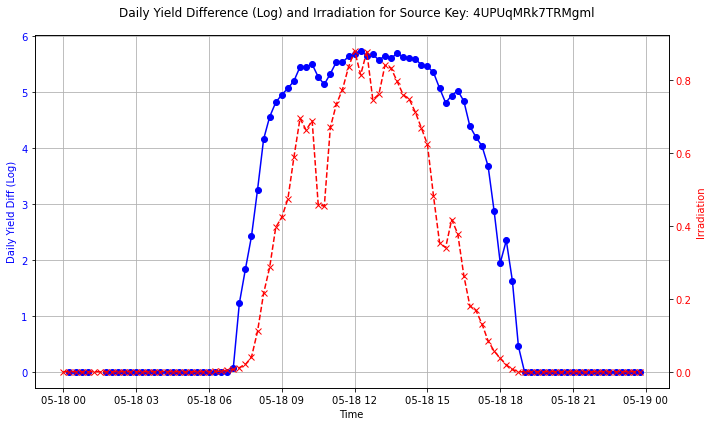

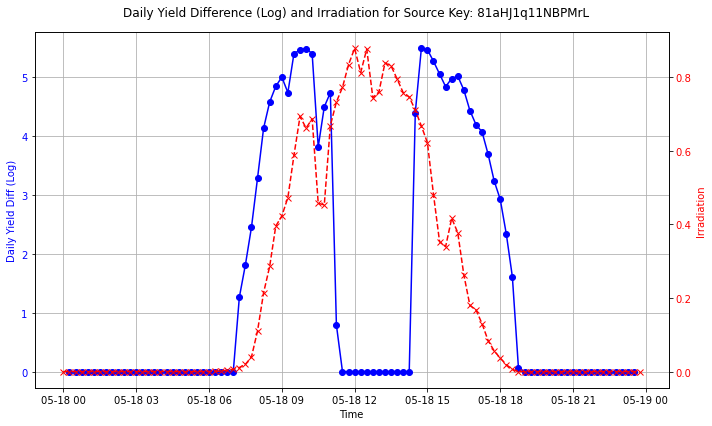

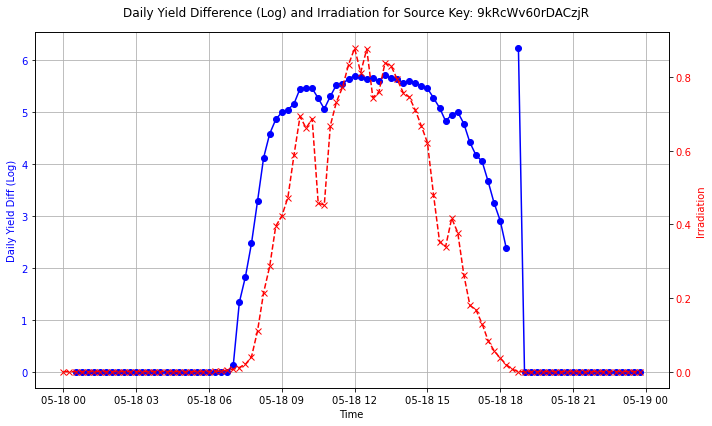

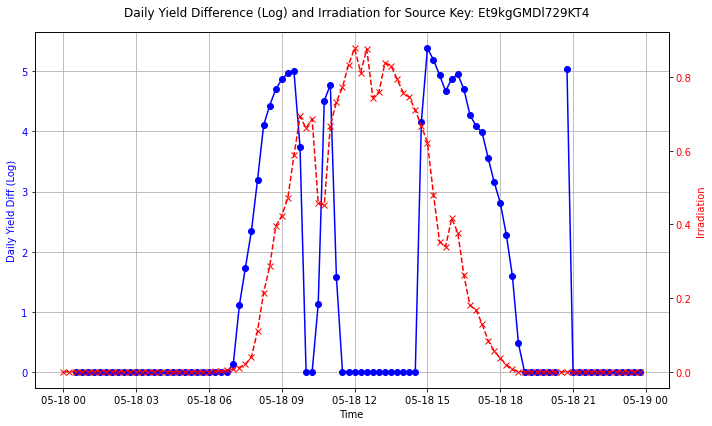

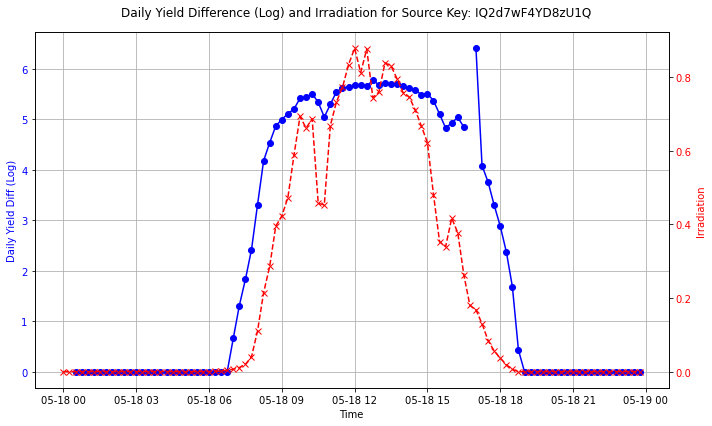

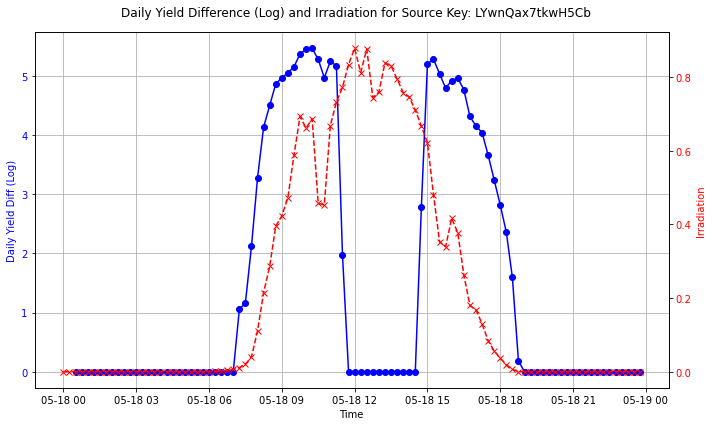

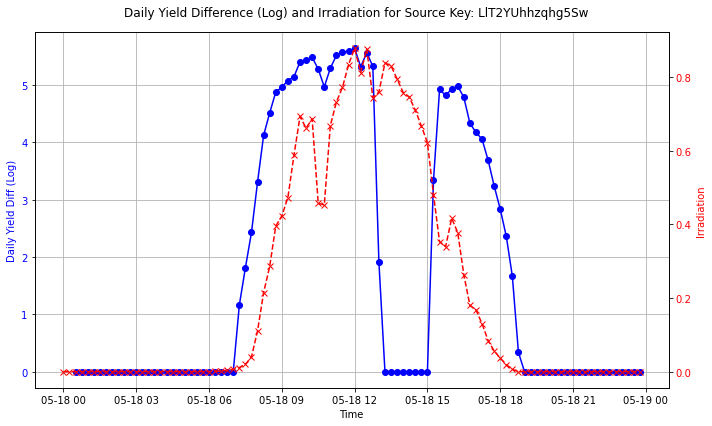

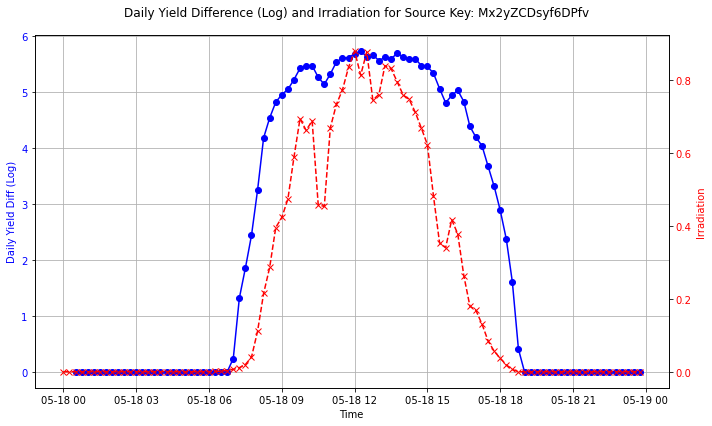

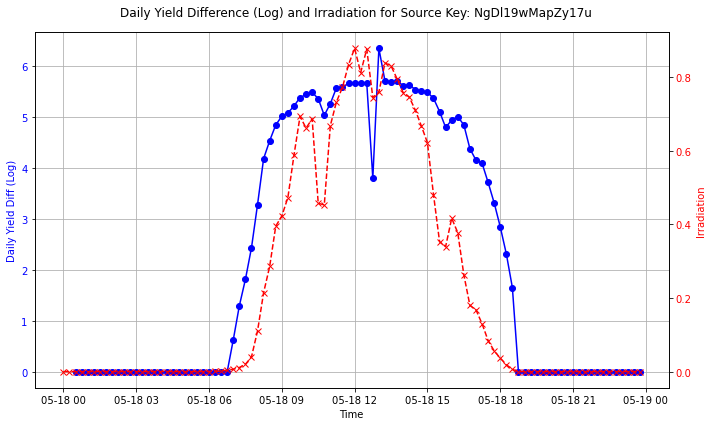

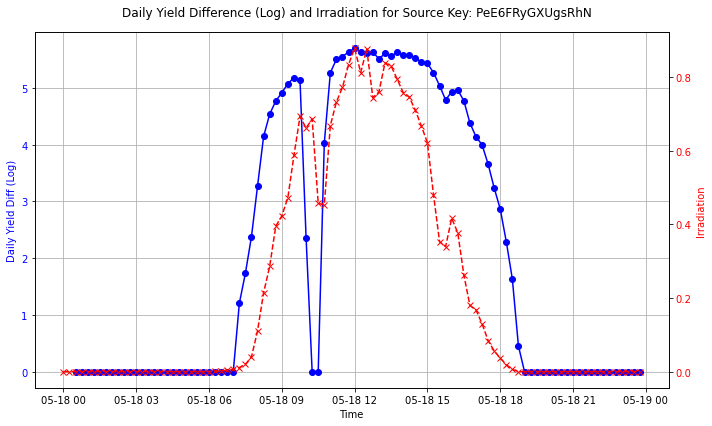

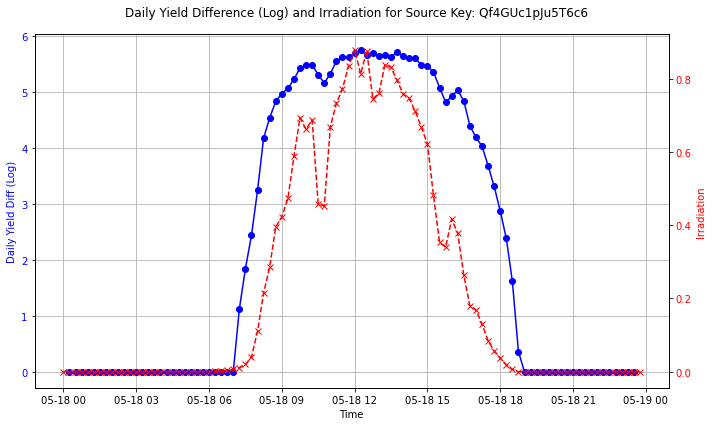

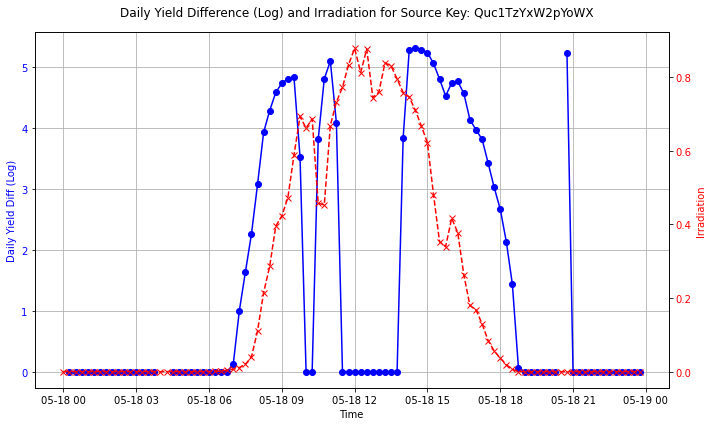

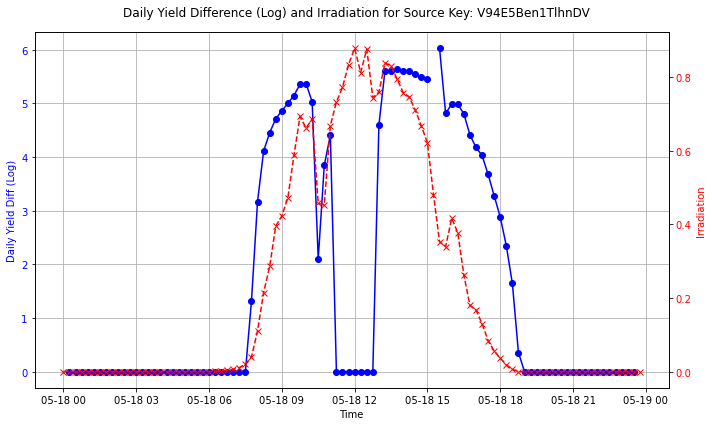

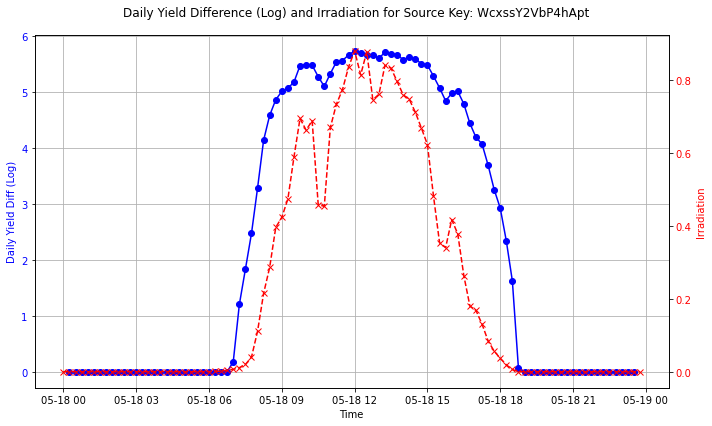

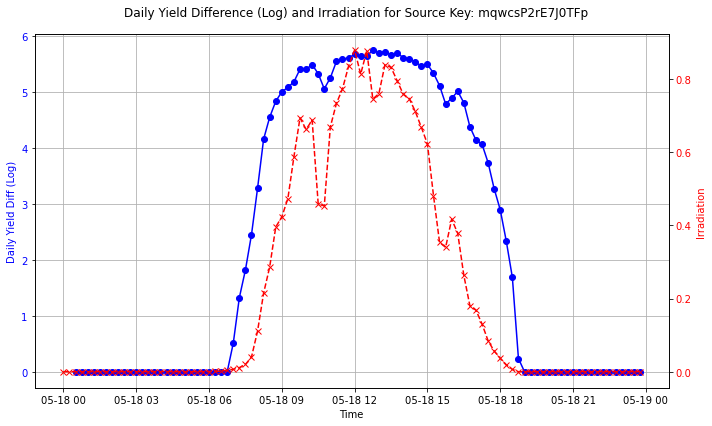

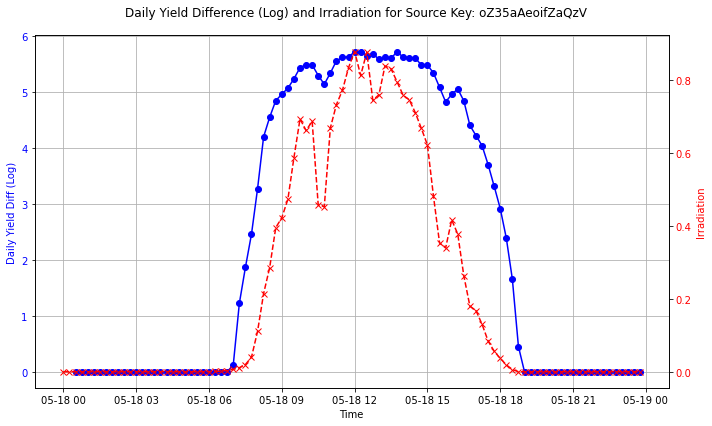

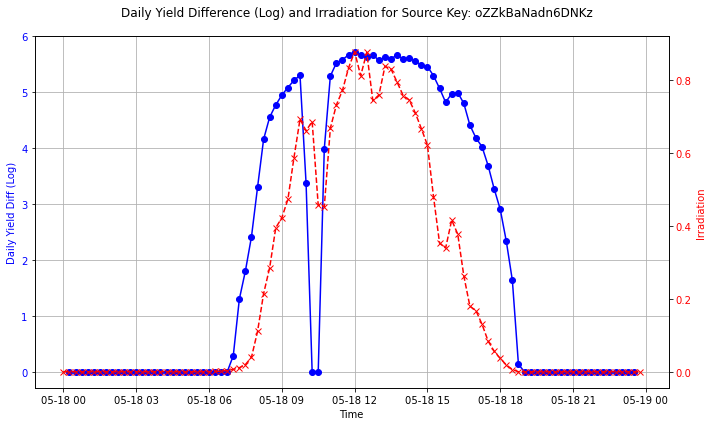

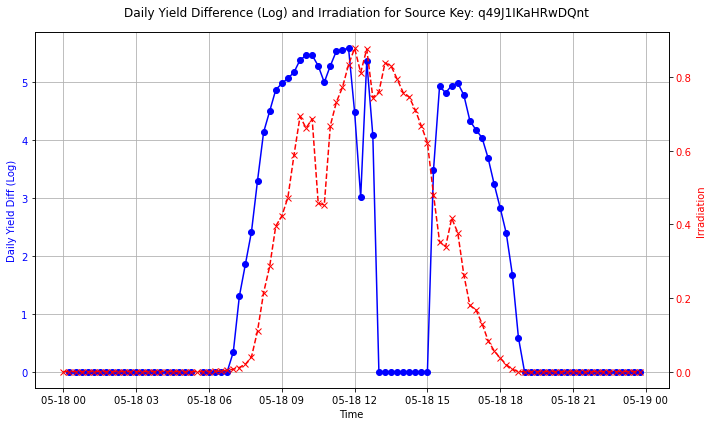

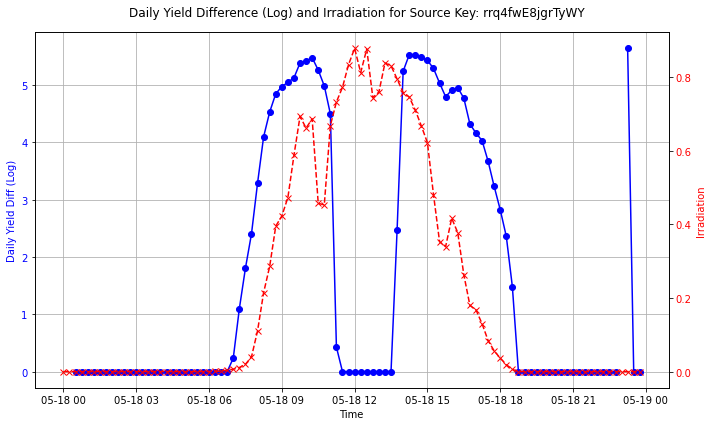

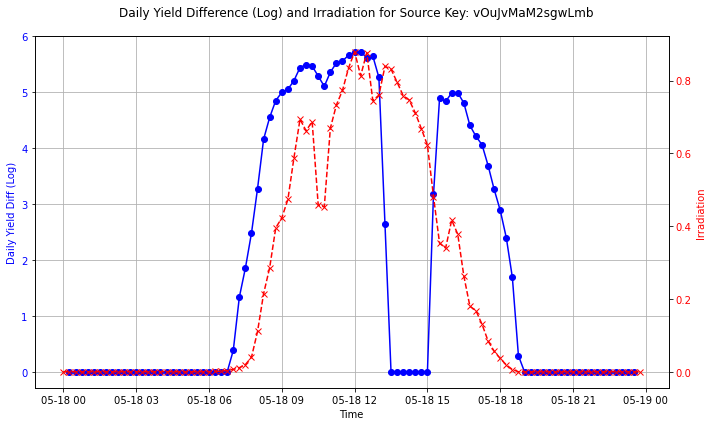

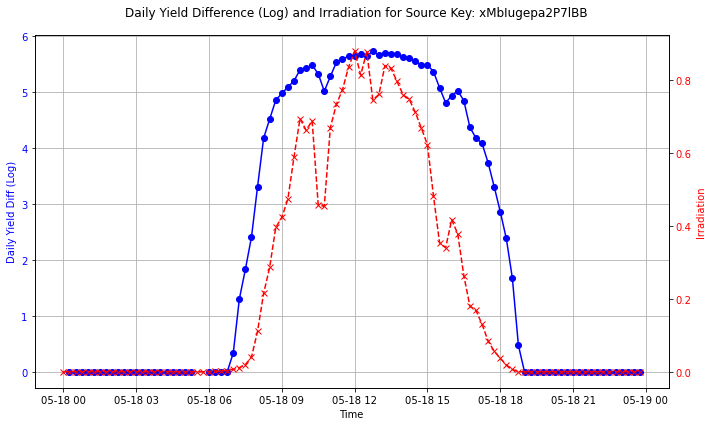

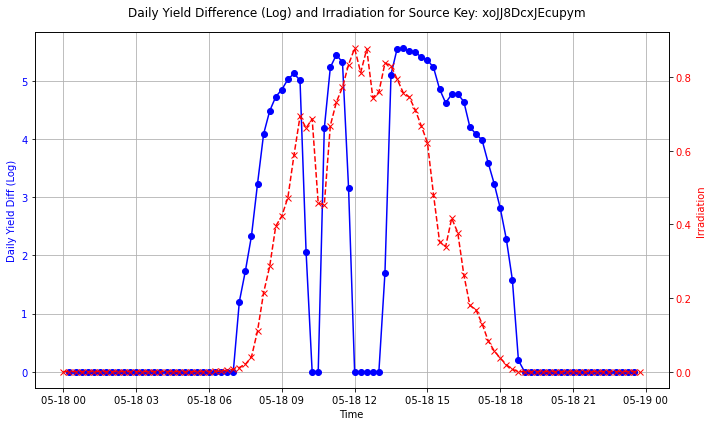

In [18]:
# # Convert DATE_TIME to datetime
# may_18_data['DATE_TIME'] = pd.to_datetime(may_18_data['DATE_TIME'])

# # Calculate the diff of DAILY_YIELD
# may_18_data['DAILY_YIELD_DIFF'] = may_18_data.groupby('SOURCE_KEY_g')['DAILY_YIELD'].diff()

# # Get unique SOURCE_KEY_g
# source_keys = may_18_data['SOURCE_KEY_g'].unique()

# # Plotting the data
# for source_key in source_keys:
#     subset = may_18_data[may_18_data['SOURCE_KEY_g'] == source_key]
#     plt.figure(figsize=(10, 6))
#     plt.plot(subset['DATE_TIME'], subset['DAILY_YIELD_DIFF'], marker='o')
#     plt.title(f'Daily Yield Difference for Source Key: {source_key}')
#     plt.xlabel('Time')
#     plt.ylabel('Daily Yield Diff')
#     plt.grid(True)
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# Apply log transformation to DAILY_YIELD_DIFF
may_18_data['DAILY_YIELD_DIFF_LOG'] = np.log1p(may_18_data['DAILY_YIELD_DIFF'])

figures = []
for source_key in source_keys:
    subset = may_18_data[may_18_data['SOURCE_KEY_g'] == source_key]
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Plot DAILY_YIELD_DIFF_LOG
    ax1.plot(subset['DATE_TIME'], subset['DAILY_YIELD_DIFF_LOG'], color='b', marker='o', label='Daily Yield Diff (Log)')
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Daily Yield Diff (Log)', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    # Create a second y-axis to plot IRRADIATION
    ax2 = ax1.twinx()
    ax2.plot(subset['DATE_TIME'], subset['IRRADIATION'], color='r', marker='x', linestyle='--', label='Irradiation')
    ax2.set_ylabel('Irradiation', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    # Title and grid
    fig.suptitle(f'Daily Yield Difference (Log) and Irradiation for Source Key: {source_key}')
    ax1.grid(True)
    fig.tight_layout()
    plt.xticks(rotation=45)
    
    figures.append(fig)

# Display all plots
for fig in figures:
    plt.show()